### Basic data analysis or exploratory data analysis (EDA)

In [4]:
from __future__ import print_function
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
# Read Training dataset as well as drop the index column
training_data = pd.read_csv('./cs-training.csv').drop('Unnamed: 0', axis = 1)


# For each column heading we replace "-" and convert the heading in lowercase 
cleancolumn = []
for i in range(len(training_data.columns)):
    cleancolumn.append(training_data.columns[i].replace('-', '').lower())
training_data.columns = cleancolumn

In [14]:
# print the 5 records of the traiing dataset
training_data.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [15]:
# Describe the all statistical properties of the training dataset
training_data[training_data.columns[1:]].describe()

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
count,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [16]:
training_data[training_data.columns[1:]].median()

revolvingutilizationofunsecuredlines       0.154181
age                                       52.000000
numberoftime3059dayspastduenotworse        0.000000
debtratio                                  0.366508
monthlyincome                           5400.000000
numberofopencreditlinesandloans            8.000000
numberoftimes90dayslate                    0.000000
numberrealestateloansorlines               1.000000
numberoftime6089dayspastduenotworse        0.000000
numberofdependents                         0.000000
dtype: float64

In [17]:
training_data[training_data.columns[1:]].mean()

revolvingutilizationofunsecuredlines       6.048438
age                                       52.295207
numberoftime3059dayspastduenotworse        0.421033
debtratio                                353.005076
monthlyincome                           6670.221237
numberofopencreditlinesandloans            8.452760
numberoftimes90dayslate                    0.265973
numberrealestateloansorlines               1.018240
numberoftime6089dayspastduenotworse        0.240387
numberofdependents                         0.757222
dtype: float64

In [18]:
# This give you the calulation of the target lebels. Which category of the target lebel is how many percentage.
total_len = len(training_data['seriousdlqin2yrs'])
percentage_labels = (training_data['seriousdlqin2yrs'].value_counts()/total_len)*100
percentage_labels

seriousdlqin2yrs
0    93.316
1     6.684
Name: count, dtype: float64

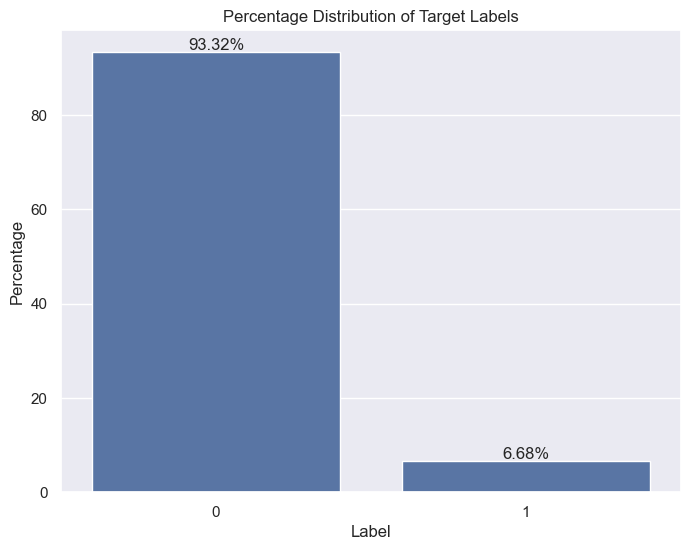

In [19]:
# Revised Plot
# Plotting the percentage distribution
sns.set()
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=percentage_labels.index, y=percentage_labels.values)
ax.set_title('Percentage Distribution of Target Labels')
ax.set_xlabel('Label')
ax.set_ylabel('Percentage')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.5, '{:.2f}%'.format(height), ha="center")
plt.show()


### Missing values

In [20]:
# You will get to know which column has missing value and it's give the count that how many records are missing 
training_data.isnull().sum()

seriousdlqin2yrs                            0
revolvingutilizationofunsecuredlines        0
age                                         0
numberoftime3059dayspastduenotworse         0
debtratio                                   0
monthlyincome                           29731
numberofopencreditlinesandloans             0
numberoftimes90dayslate                     0
numberrealestateloansorlines                0
numberoftime6089dayspastduenotworse         0
numberofdependents                       3924
dtype: int64

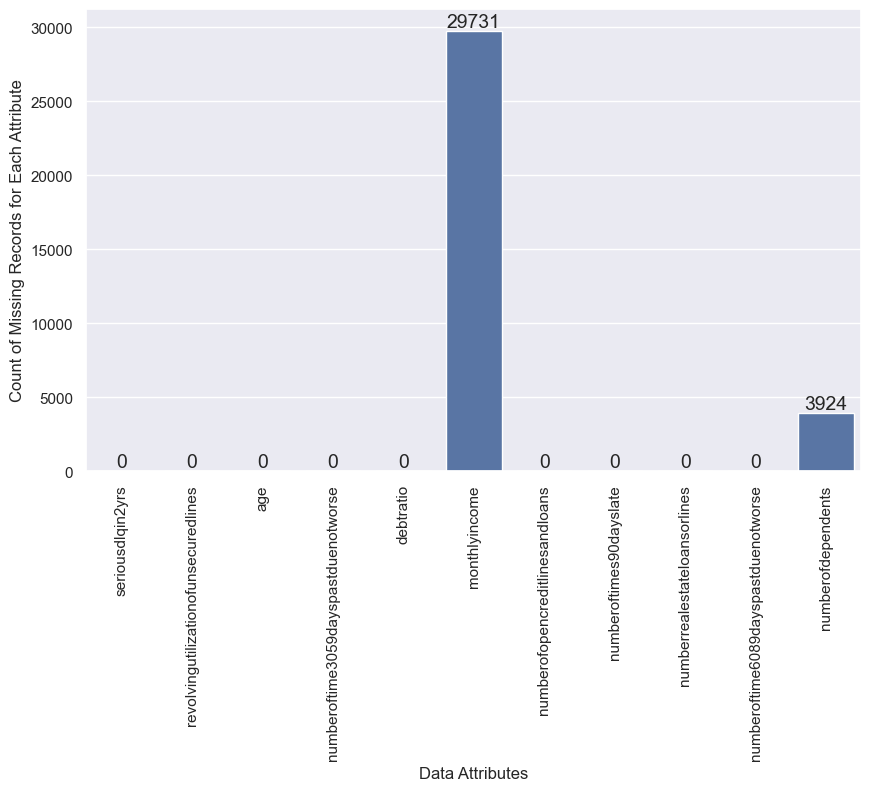

In [21]:
# revised code 
x = training_data.columns
y = training_data.isnull().sum()
sns.set()
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x=x, y=y)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 2, int(height),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Data Attributes")
ax.set_ylabel("Count of Missing Records for Each Attribute")
plt.xticks(rotation=90)
plt.show()

In [22]:
# Actual replacement of the missing value using mean value.
training_data_mean_replace = training_data.fillna((training_data.mean()))
training_data_mean_replace.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [23]:
training_data_mean_replace.isnull().sum()

seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime3059dayspastduenotworse     0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime6089dayspastduenotworse     0
numberofdependents                      0
dtype: int64

In [24]:
# Actual replacement of the missing value using median value.
training_data_median_replace = training_data.fillna((training_data.median()))
training_data_median_replace.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [25]:
training_data_median_replace.isnull().sum()

seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime3059dayspastduenotworse     0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime6089dayspastduenotworse     0
numberofdependents                      0
dtype: int64

### Correlation

#### Why replace null values with median not mean?
:By looking at the boxplot below in monthly income and numberofdependents plot, we can observed that there are multiple of outliers above the 3rd quartile, which harms the mean.Therefore, it is appropriate to

<Axes: ylabel='monthlyincome'>

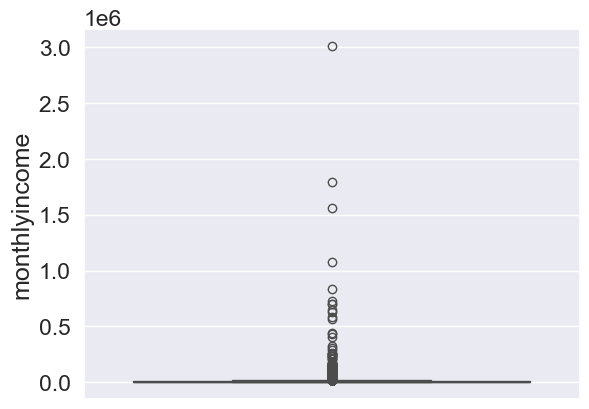

In [26]:
sns.boxplot(training_data['monthlyincome'])

<Axes: ylabel='numberofdependents'>

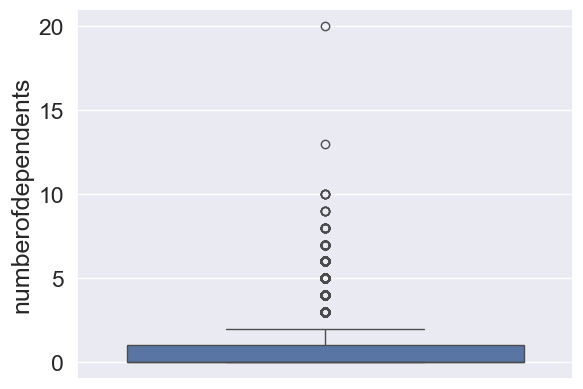

In [27]:
sns.boxplot(training_data['numberofdependents'])

In [28]:
training_data.fillna((training_data.median()), inplace=True)
# Get the correlation of the training dataset
training_data[training_data.columns[1:]].corr()

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
revolvingutilizationofunsecuredlines,1.000000,-0.005898,-0.001314,0.003961,0.006513,-0.011281,-0.001061,0.006235,-0.001048,0.001193
age,-0.005898,1.000000,-0.062995,0.024188,0.027581,0.147705,-0.061005,0.033150,-0.057159,-0.215693
numberoftime3059dayspastduenotworse,-0.001314,-0.062995,1.000000,-0.006542,-0.008370,-0.055312,0.983603,-0.030565,0.987005,-0.004590
debtratio,0.003961,0.024188,-0.006542,1.000000,-0.018006,0.049565,-0.008320,0.120046,-0.007533,-0.044476
monthlyincome,0.006513,0.027581,-0.008370,-0.018006,1.000000,0.086949,-0.010500,0.116273,-0.009252,0.066314
numberofopencreditlinesandloans,-0.011281,0.147705,-0.055312,0.049565,0.086949,1.000000,-0.079984,0.433959,-0.071077,0.074026
numberoftimes90dayslate,-0.001061,-0.061005,0.983603,-0.008320,-0.010500,-0.079984,1.000000,-0.045205,0.992796,-0.011962
numberrealestateloansorlines,0.006235,0.033150,-0.030565,0.120046,0.116273,0.433959,-0.045205,1.000000,-0.039722,0.129399
numberoftime6089dayspastduenotworse,-0.001048,-0.057159,0.987005,-0.007533,-0.009252,-0.071077,0.992796,-0.039722,1.000000,-0.012678
numberofdependents,0.001193,-0.215693,-0.004590,-0.044476,0.066314,0.074026,-0.011962,0.129399,-0.012678,1.000000


In [29]:
training_data[training_data.columns[1:]].corr()

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
revolvingutilizationofunsecuredlines,1.000000,-0.005898,-0.001314,0.003961,0.006513,-0.011281,-0.001061,0.006235,-0.001048,0.001193
age,-0.005898,1.000000,-0.062995,0.024188,0.027581,0.147705,-0.061005,0.033150,-0.057159,-0.215693
numberoftime3059dayspastduenotworse,-0.001314,-0.062995,1.000000,-0.006542,-0.008370,-0.055312,0.983603,-0.030565,0.987005,-0.004590
debtratio,0.003961,0.024188,-0.006542,1.000000,-0.018006,0.049565,-0.008320,0.120046,-0.007533,-0.044476
monthlyincome,0.006513,0.027581,-0.008370,-0.018006,1.000000,0.086949,-0.010500,0.116273,-0.009252,0.066314
numberofopencreditlinesandloans,-0.011281,0.147705,-0.055312,0.049565,0.086949,1.000000,-0.079984,0.433959,-0.071077,0.074026
numberoftimes90dayslate,-0.001061,-0.061005,0.983603,-0.008320,-0.010500,-0.079984,1.000000,-0.045205,0.992796,-0.011962
numberrealestateloansorlines,0.006235,0.033150,-0.030565,0.120046,0.116273,0.433959,-0.045205,1.000000,-0.039722,0.129399
numberoftime6089dayspastduenotworse,-0.001048,-0.057159,0.987005,-0.007533,-0.009252,-0.071077,0.992796,-0.039722,1.000000,-0.012678
numberofdependents,0.001193,-0.215693,-0.004590,-0.044476,0.066314,0.074026,-0.011962,0.129399,-0.012678,1.000000


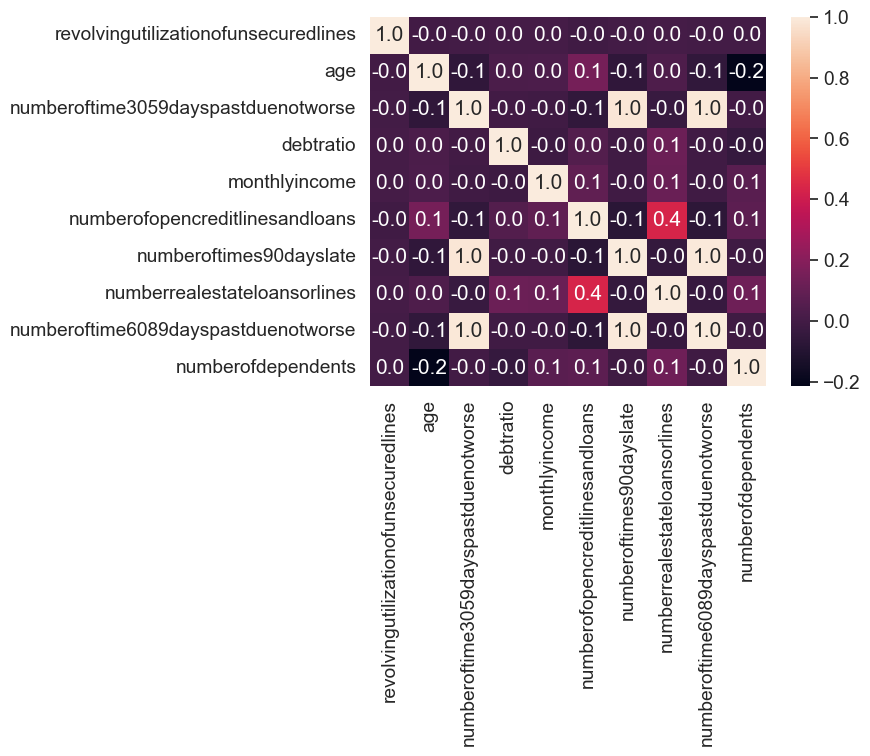

In [30]:
sns.set()
sns.set(font_scale=1.25)
sns.heatmap(training_data[training_data.columns[1:]].corr(),annot=True,fmt=".1f")
plt.show()

#### Interpretation of correlation(Parts to add content)

### Outliers Detection

In [31]:
# Percentile based outlier detection
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    (minval, maxval) = np.percentile(data, [diff, 100 - diff])
    #return minval, maxval
    return ((data < minval) | (data > maxval))
#percentile_based_outlier(data=training_data.revolvingutilizationofunsecuredlines)

# Another percentile based outlier detection method which is based on inter quertile(IQR) range
# import numpy as np
# def outliers_iqr(ys):
#     quartile_1, quartile_3 = np.percentile(ys, [25, 75])
#     iqr = quartile_3 - quartile_1
#     lower_bound = quartile_1 - (iqr * 1.5)
#     upper_bound = quartile_3 + (iqr * 1.5)
#     return np.where((ys > upper_bound) | (ys < lower_bound))

In [32]:
def mad_based_outlier(points, threshold=3.5):
    median_y = np.median(points)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in points])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in points]

    return np.abs(modified_z_scores) > threshold
#mad_based_outlier(points=training_data.age)

In [33]:
def std_div(data, threshold=3):
    std = data.std()
    mean = data.mean()
    isOutlier = []
    for val in data:
        if val/std > threshold:
            isOutlier.append(True)
        else:
            isOutlier.append(False)
    return isOutlier
#std_div(data=training_data.age)

In [34]:
# Revised version
def outlierVote(data):
    x = percentile_based_outlier(data)
    y = mad_based_outlier(data)
    z = std_div(data)
    temp = list(zip(data.index, x, y, z))  # Convert zip object to list
    final = []
    for i in range(len(temp)):
        if temp[i].count(False) >= 2:
            final.append(False)
        else:
            final.append(True)
    return final

In [35]:
def plotOutlier(x):
    fig, axes = plt.subplots(nrows=4)
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=20)
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    axes[2].set_title('STD-based Outliers', **kwargs)
    axes[3].set_title('Majority vote based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,10)

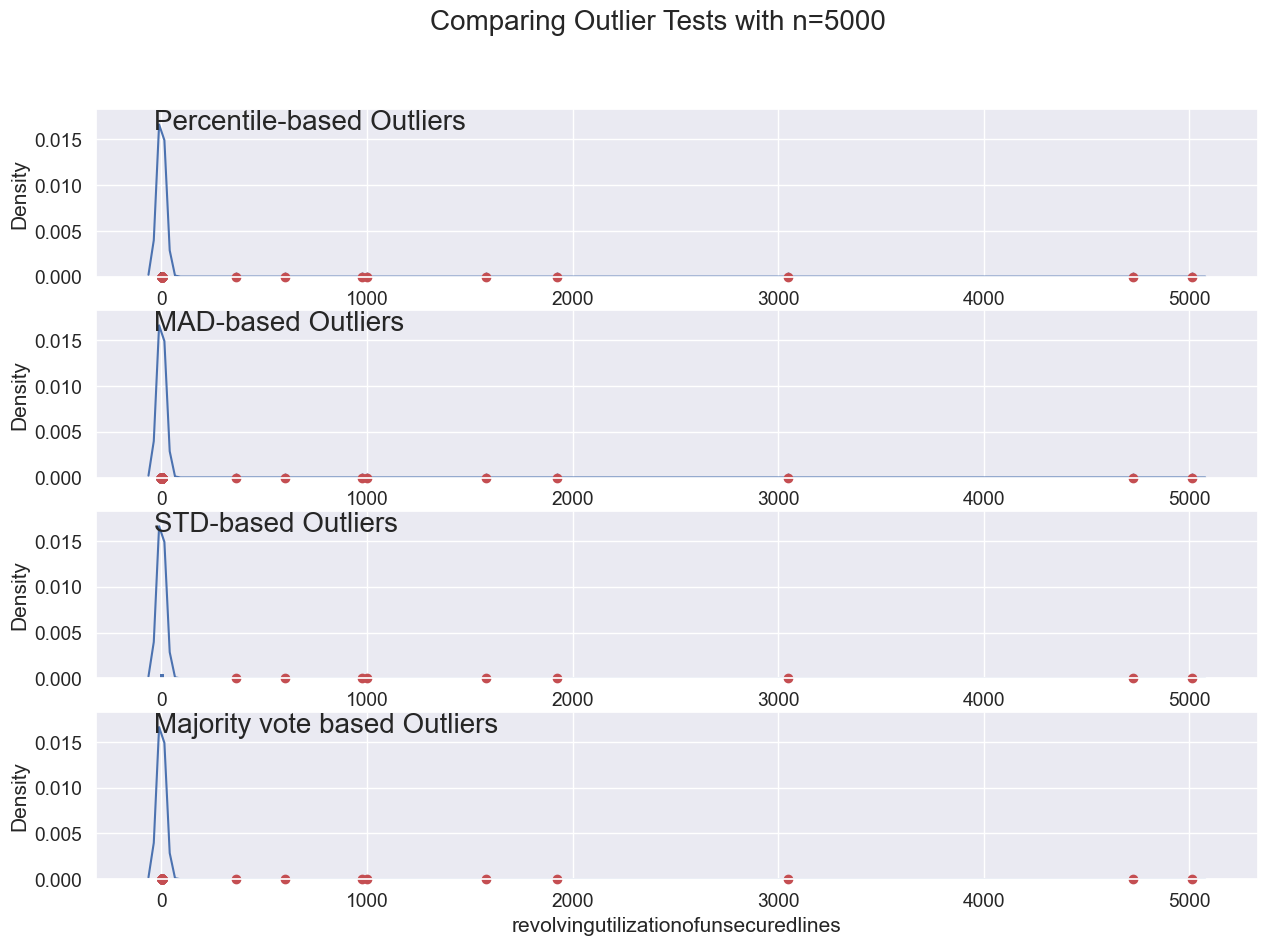

In [36]:
plotOutlier(training_data.revolvingutilizationofunsecuredlines.sample(5000))

In [37]:
training_data.revolvingutilizationofunsecuredlines.median()

0.154180737

In [38]:
condition_1 = training_data.revolvingutilizationofunsecuredlines > 0.99999

In [39]:
# proportion of data larger than 1
condition_1.sum() / len(training_data.revolvingutilizationofunsecuredlines)

0.09062666666666666

<Axes: ylabel='revolvingutilizationofunsecuredlines'>

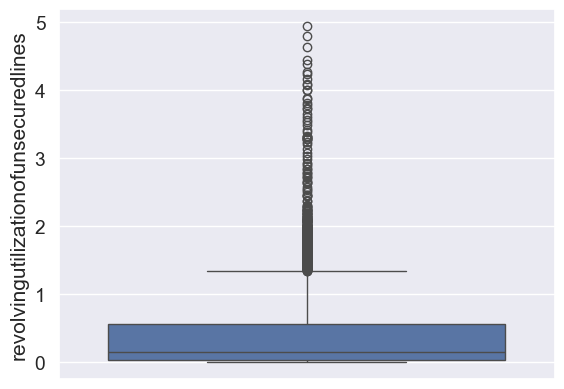

In [40]:
sns.boxplot(training_data.revolvingutilizationofunsecuredlines[training_data.revolvingutilizationofunsecuredlines < 5])

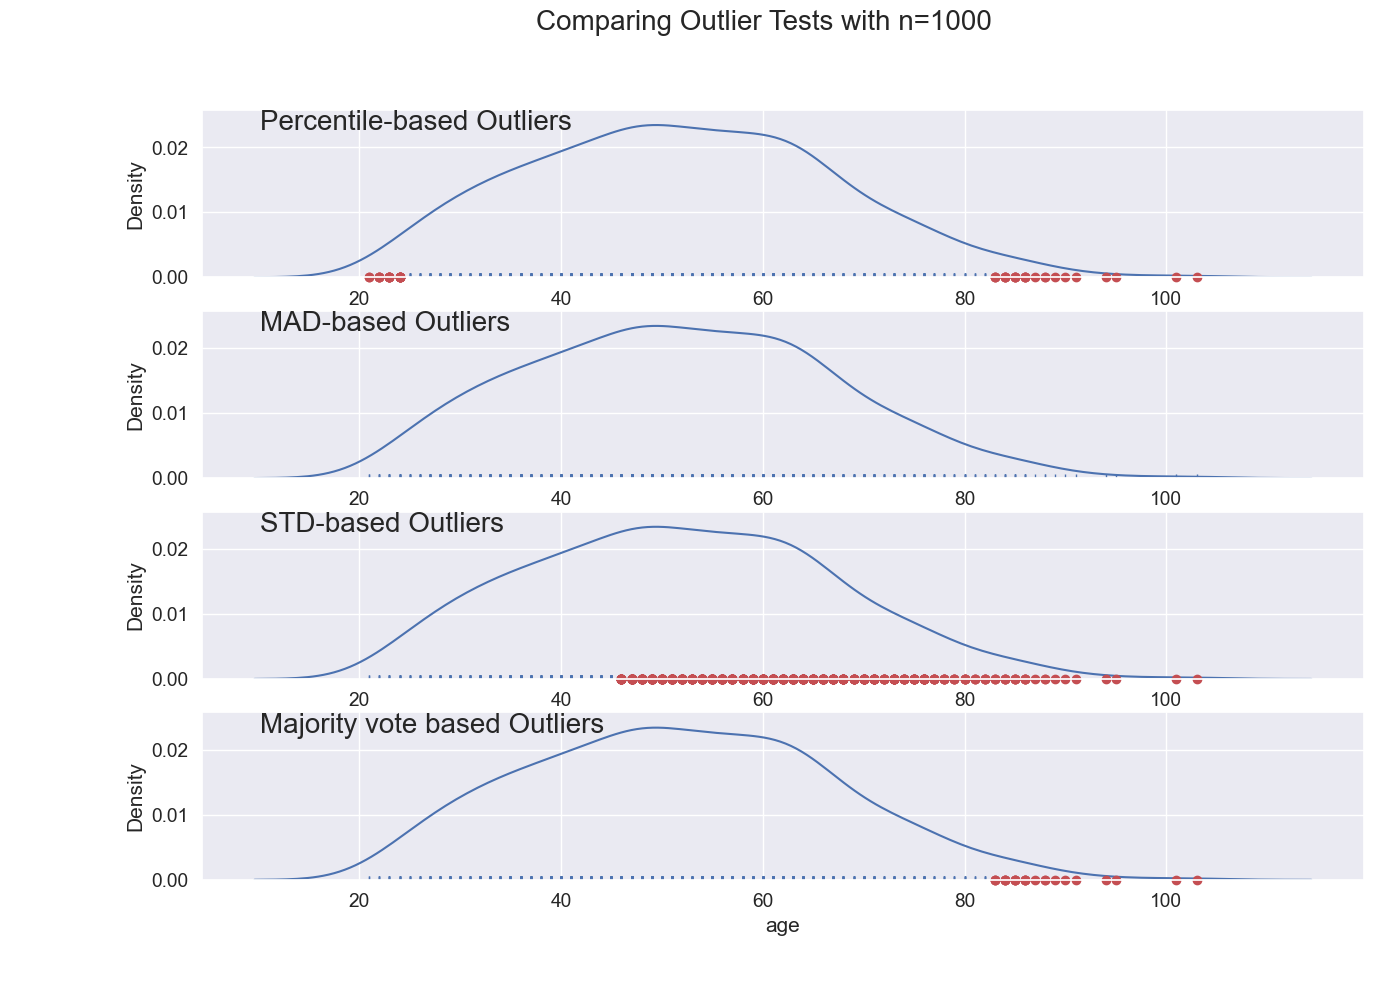

In [41]:
plotOutlier(training_data.age.sample(1000))

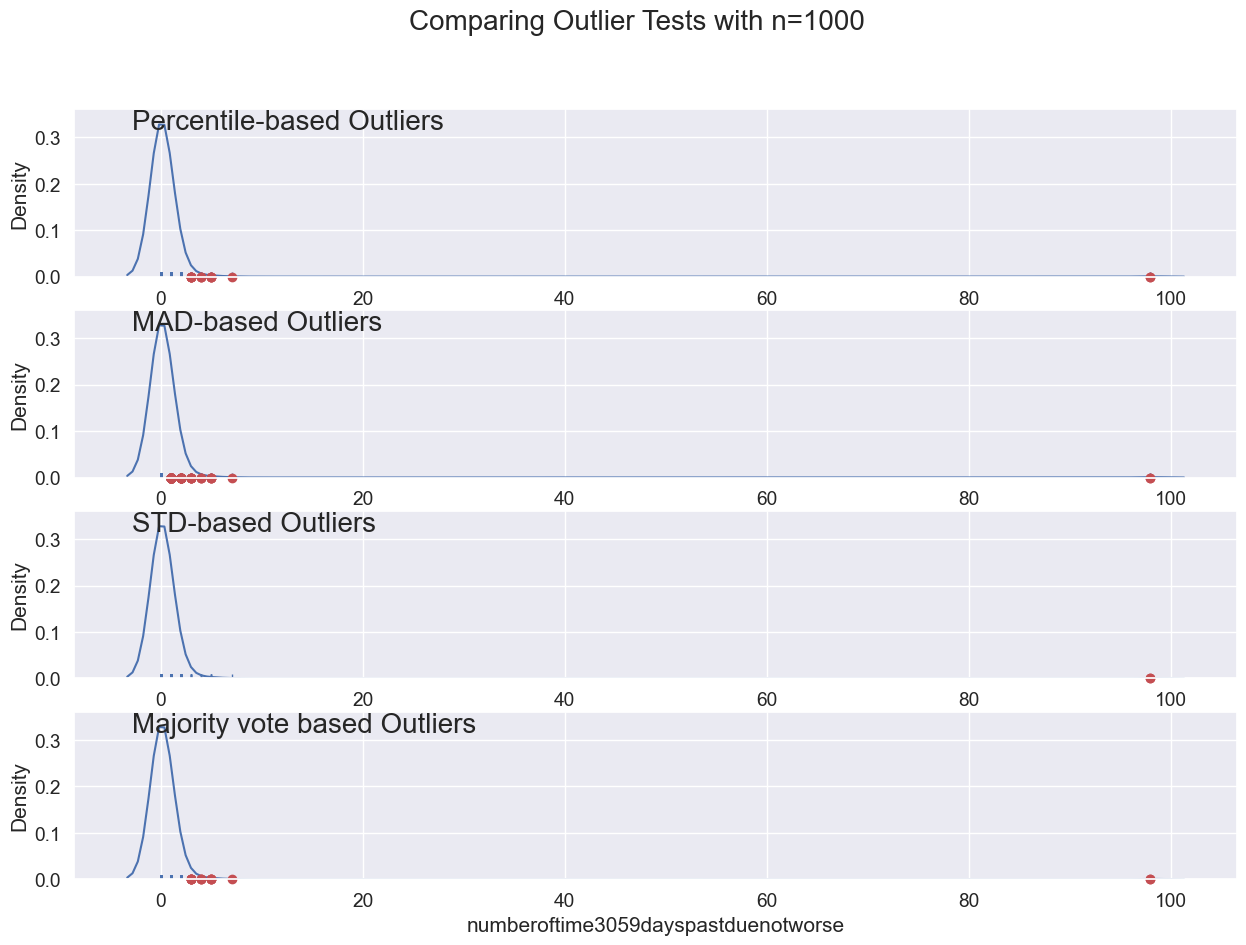

In [42]:
plotOutlier(training_data.numberoftime3059dayspastduenotworse.sample(1000))

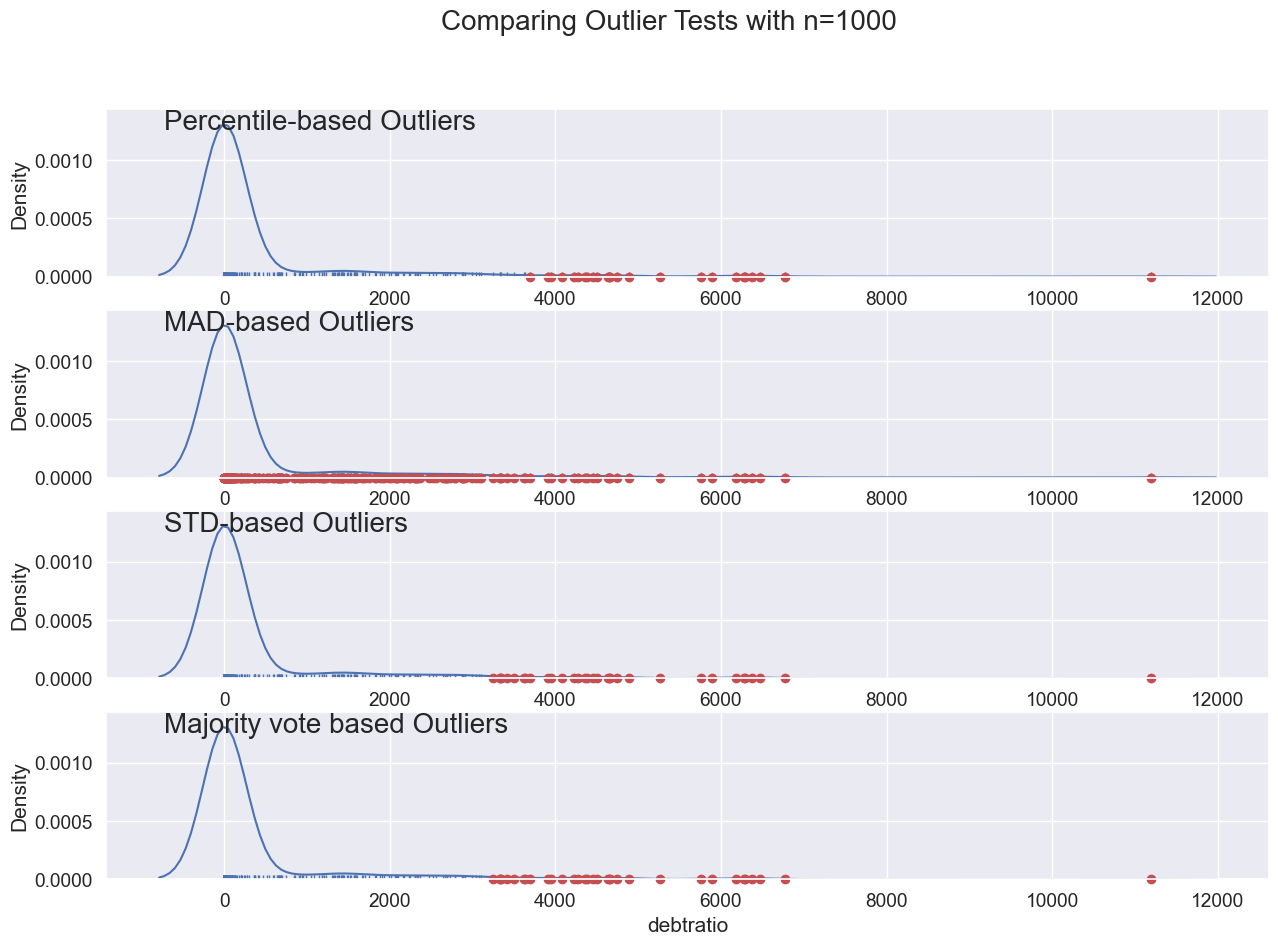

In [43]:
plotOutlier(training_data.debtratio.sample(1000))

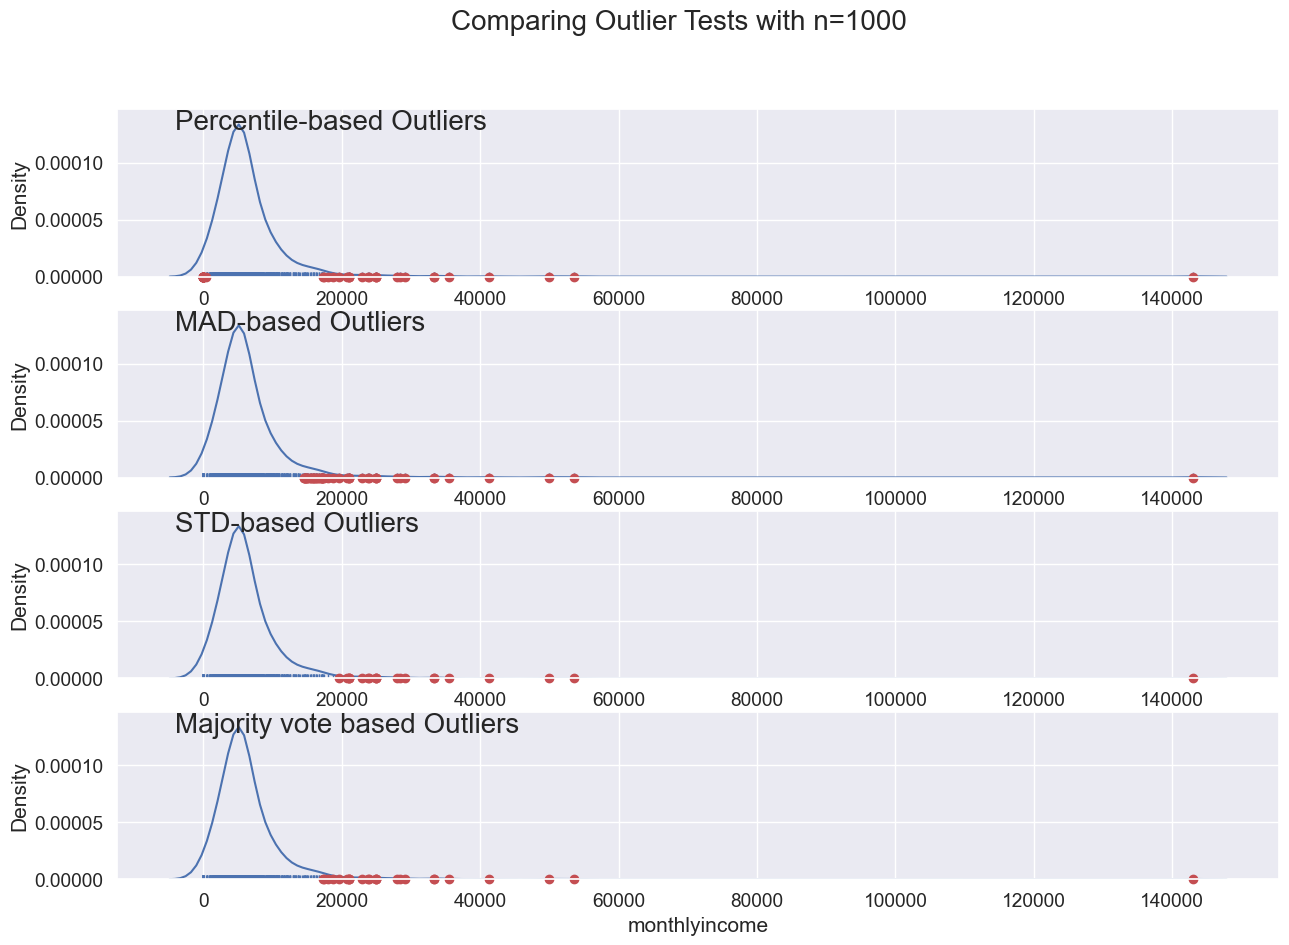

In [44]:
plotOutlier(training_data.monthlyincome.sample(1000))

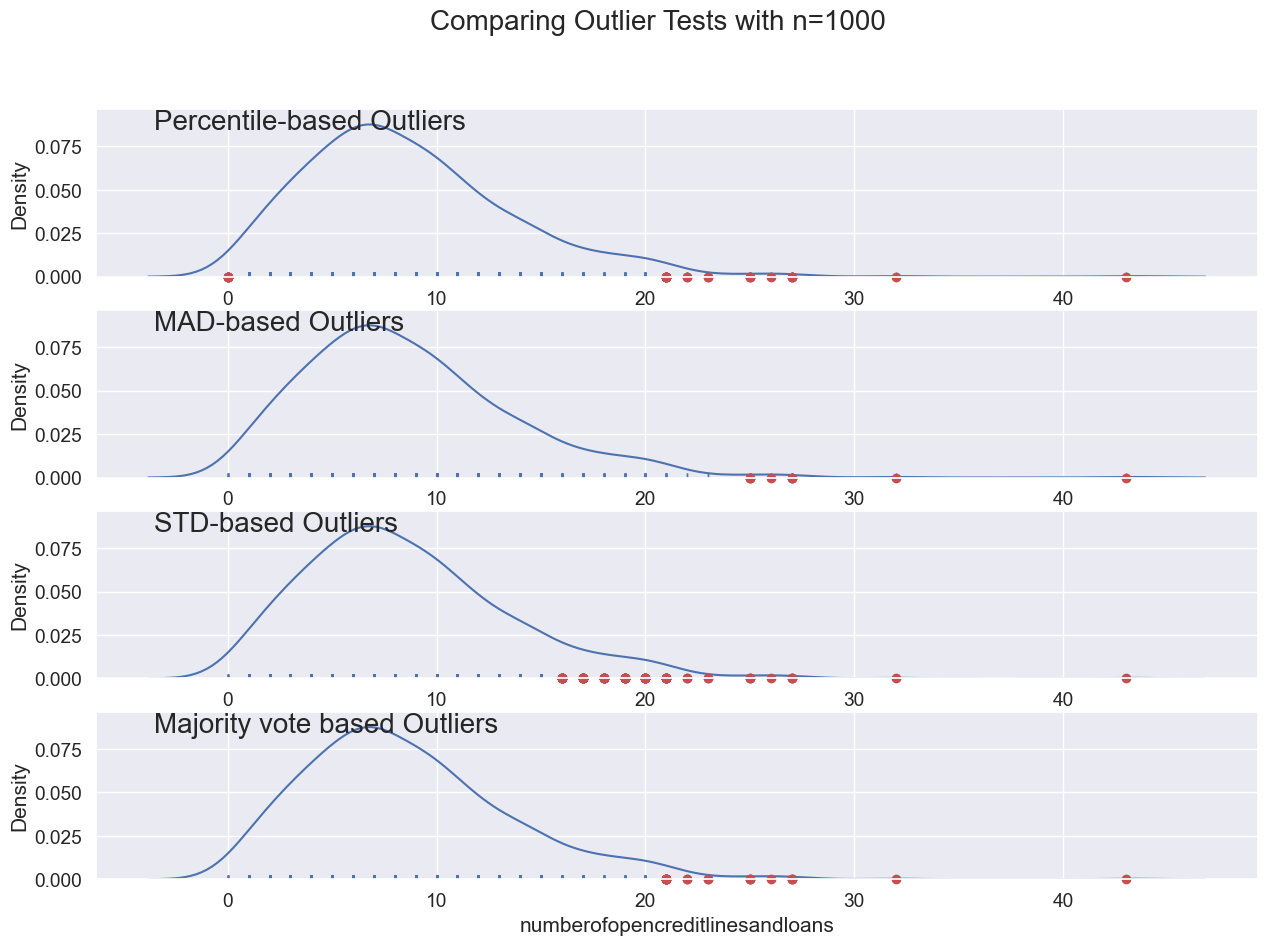

In [45]:
plotOutlier(training_data.numberofopencreditlinesandloans.sample(1000))

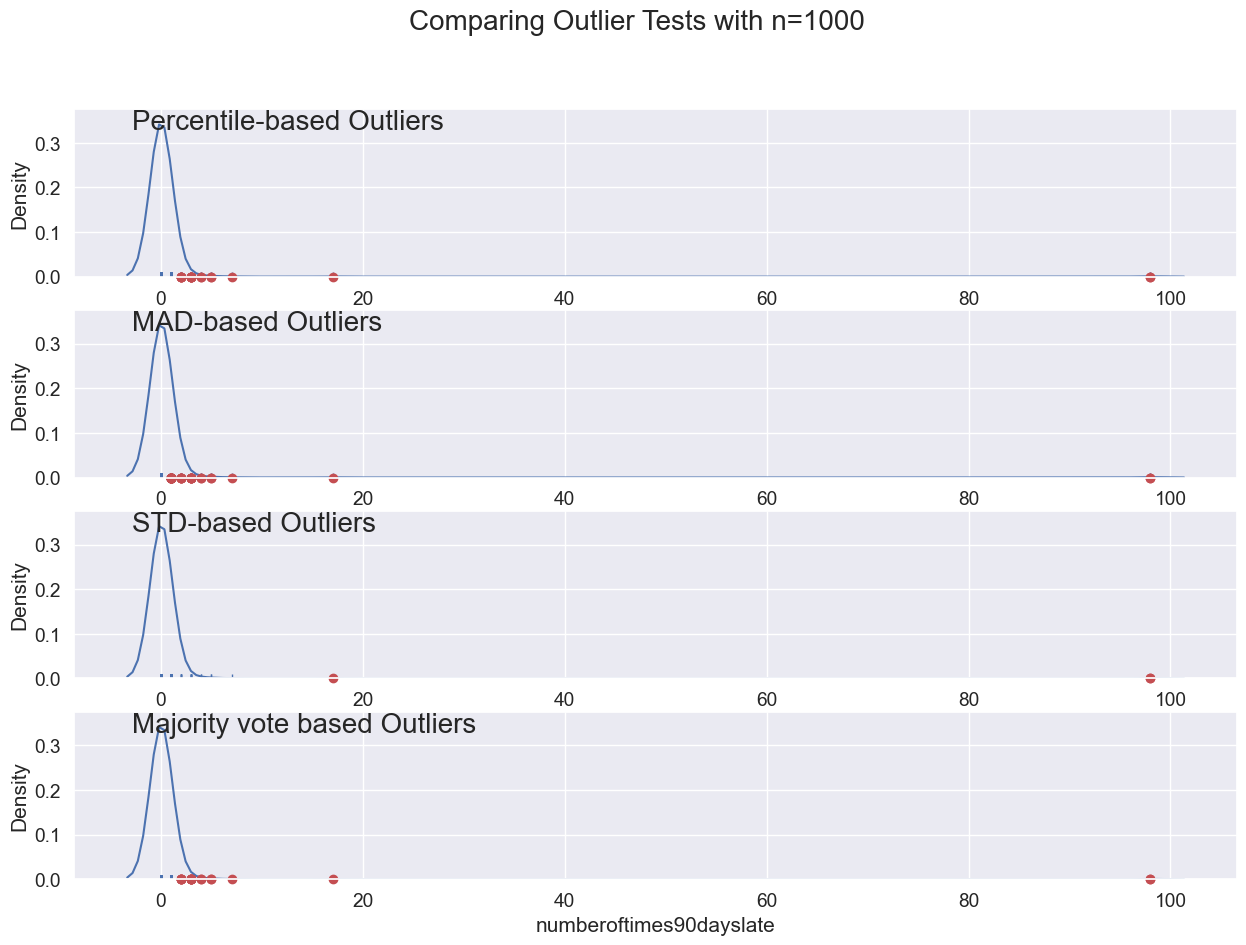

In [46]:
plotOutlier(training_data.numberoftimes90dayslate.sample(1000))

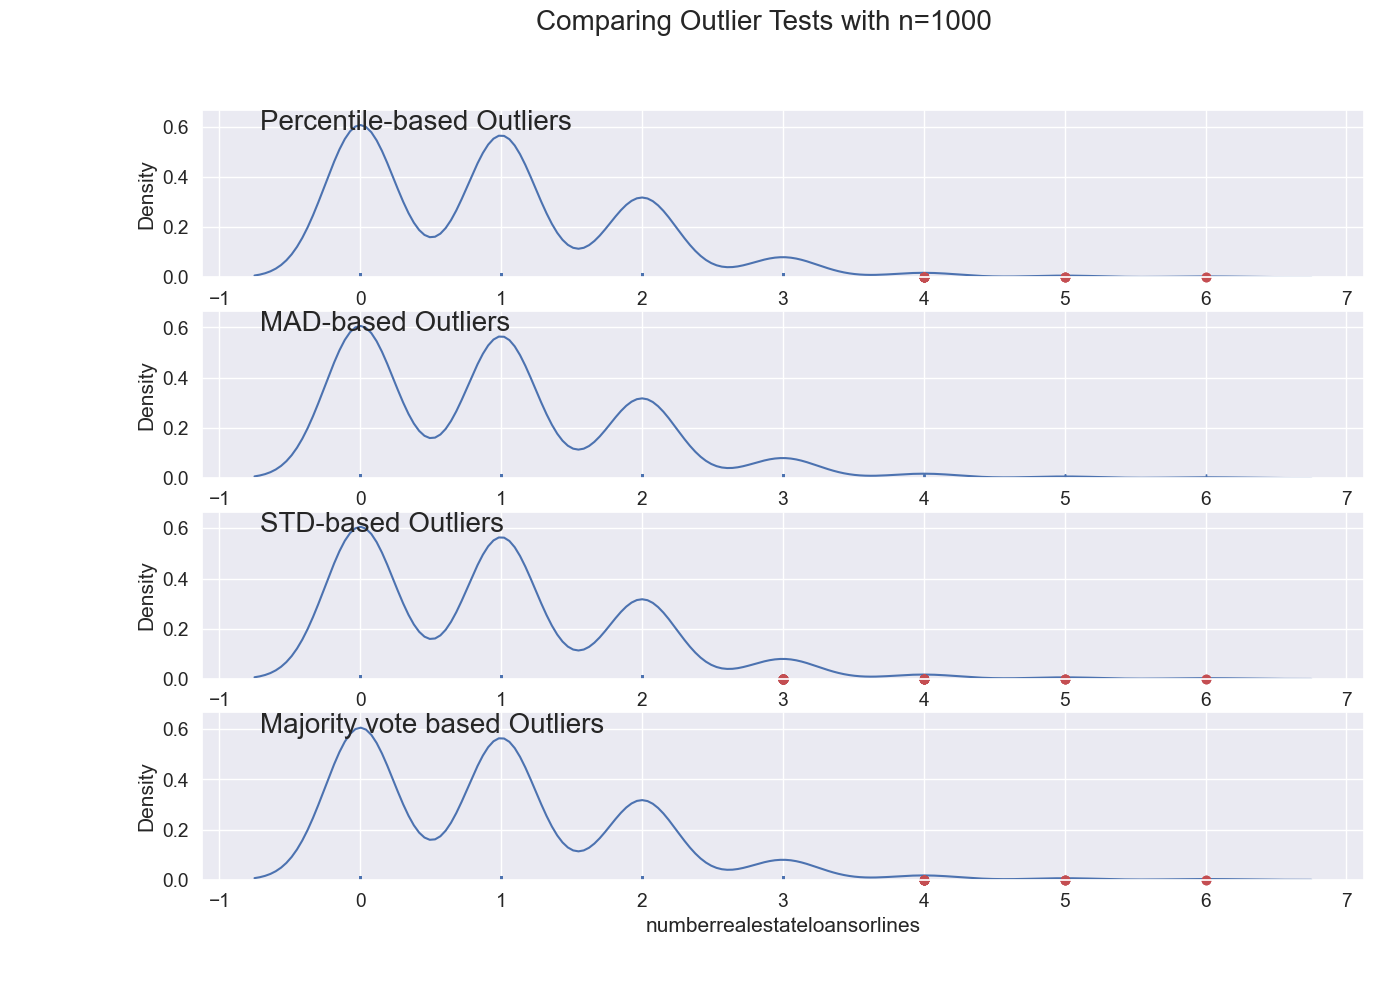

In [47]:
plotOutlier(training_data.numberrealestateloansorlines.sample(1000))

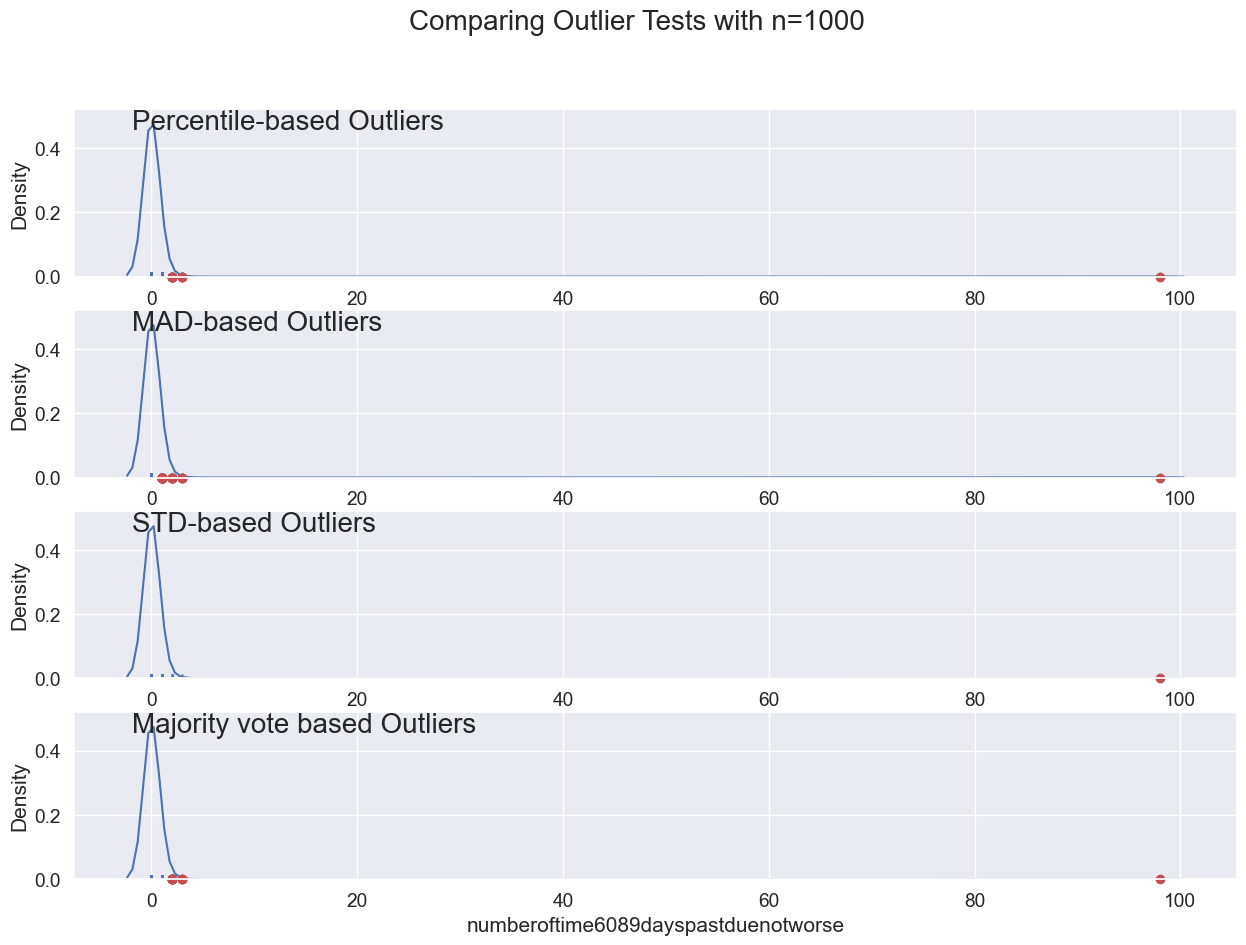

In [48]:
plotOutlier(training_data.numberoftime6089dayspastduenotworse.sample(1000))

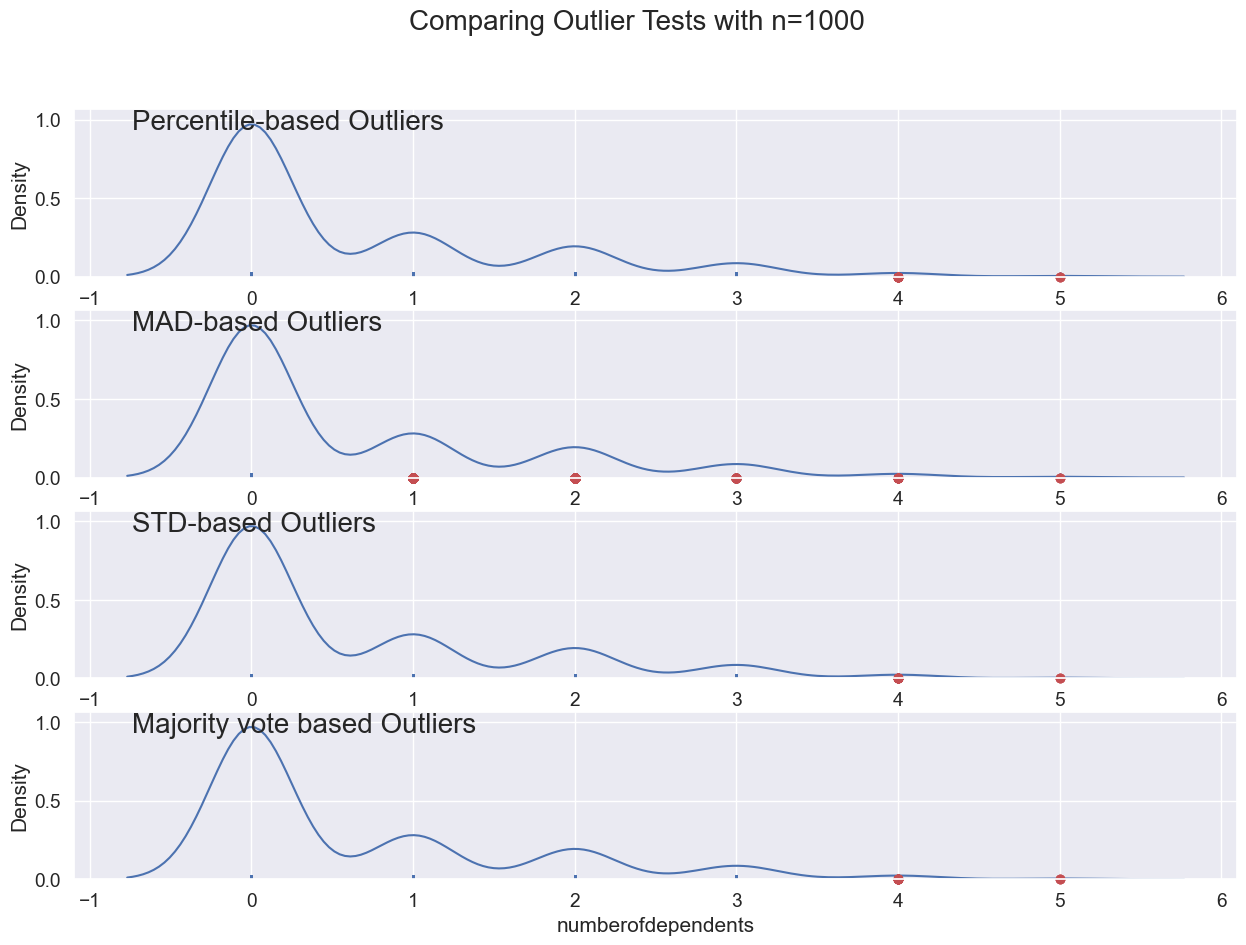

In [49]:
plotOutlier(training_data.numberofdependents.sample(1000))

### Handle the outliers

In [50]:
def plotOutlierFree(x):
    fig, axes = plt.subplots(nrows=4)
    nOutliers = []
    funcs = [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]
    titles = ['Percentile-based', 'MAD-based', 'STD-based', 'Majority vote based']
    
    for ax, func, title in zip(axes, funcs, titles):
        mask_outliers = np.array(func(x))  # Ensure that mask_outliers is a NumPy array
        n_outliers = np.sum(mask_outliers)
        nOutliers.append(n_outliers)
        outlier_free = x[~mask_outliers]  # Use the mask to filter non-outliers
        sns.distplot(outlier_free, ax=ax, rug=True, hist=False)
        ax.set_title(f'{title} Outliers, removed: {n_outliers}', y=0.95, x=0.05, ha='left', va='top', size=15)
        
    fig.suptitle(f'Outlier Removed By Method with n={len(x)}', size=20)
    fig.set_size_inches(15, 10)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

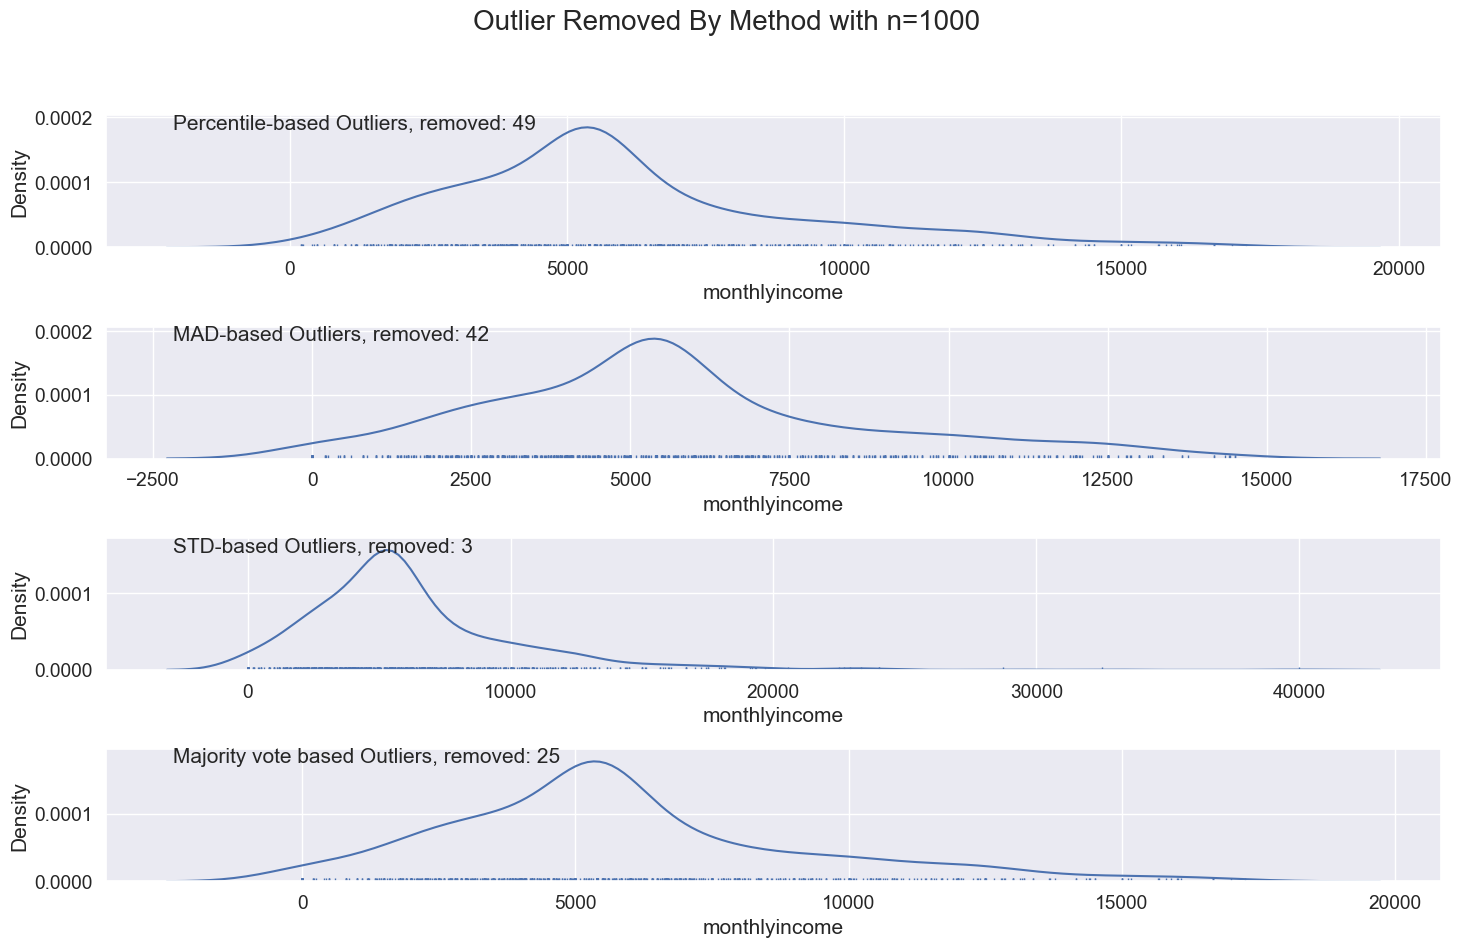

In [51]:
plotOutlierFree(training_data.monthlyincome.sample(1000))

In [52]:
def replaceOutlier(data, method = outlierVote, replace='median'):
    '''replace: median (auto)
                'minUpper' which is the upper bound of the outlier detection'''
    vote = outlierVote(data)
    x = pd.DataFrame(zip(data, vote), columns=['debt', 'outlier'])
    if replace == 'median':
        replace = x.debt.median()
    elif replace == 'minUpper':
        replace = min([val for (val, vote) in zip(data, vote) if vote == True])
        if replace < data.mean():
            return 'There are outliers lower than the sample mean'
    debtNew = []
    for i in range(x.shape[0]):
        if x.iloc[i][1] == True:
            debtNew.append(replace)
        else:
            debtNew.append(x.iloc[i][0])
    
    return debtNew

In [53]:
incomeNew = replaceOutlier(training_data.monthlyincome, replace='minUpper')

In [54]:
training_data.monthlyincome = incomeNew

In [57]:
import pandas as pd
import numpy as np

# Example DataFrame

df = training_data

# Function to adjust values to fit within the IQR
def adjust_to_iqr(df):
    for column in df.columns:
        if column == 'seriousdlqin2yrs':
            continue  # Skip the excluded column
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    
    return df

# Adjust DataFrame
training_data = adjust_to_iqr(df)

# Show the adjusted DataFrame
print(training_data.head())


   seriousdlqin2yrs  revolvingutilizationofunsecuredlines   age  \
0                 1                              0.766127  45.0   
1                 0                              0.957151  40.0   
2                 0                              0.658180  38.0   
3                 0                              0.233810  30.0   
4                 0                              0.907239  49.0   

   numberoftime3059dayspastduenotworse  debtratio  monthlyincome  \
0                                  0.0   0.802982         9120.0   
1                                  0.0   0.121876         2600.0   
2                                  0.0   0.085113         3042.0   
3                                  0.0   0.036050         3300.0   
4                                  0.0   0.024926        12645.5   

   numberofopencreditlinesandloans  numberoftimes90dayslate  \
0                             13.0                      0.0   
1                              4.0                      0.0   

### Feature Importance

In [58]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   seriousdlqin2yrs                      150000 non-null  int64  
 1   revolvingutilizationofunsecuredlines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   numberoftime3059dayspastduenotworse   150000 non-null  float64
 4   debtratio                             150000 non-null  float64
 5   monthlyincome                         150000 non-null  float64
 6   numberofopencreditlinesandloans       150000 non-null  float64
 7   numberoftimes90dayslate               150000 non-null  float64
 8   numberrealestateloansorlines          150000 non-null  float64
 9   numberoftime6089dayspastduenotworse   150000 non-null  float64
 10  numberofdependents                    150000 non-null  float64
dtype

In [59]:
training_data.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45.0,0.0,0.802982,9120.0,13.0,0.0,5.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,0.0,0.085113,3042.0,2.0,0.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,0.0,0.024926,12645.5,7.0,0.0,1.0,0.0,0.0


In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
training_data.columns[1:]

Index(['revolvingutilizationofunsecuredlines', 'age',
       'numberoftime3059dayspastduenotworse', 'debtratio', 'monthlyincome',
       'numberofopencreditlinesandloans', 'numberoftimes90dayslate',
       'numberrealestateloansorlines', 'numberoftime6089dayspastduenotworse',
       'numberofdependents'],
      dtype='object')

In [62]:
X = training_data.drop('seriousdlqin2yrs', axis=1)
y = training_data.seriousdlqin2yrs
features_label = training_data.columns[1:]
forest = RandomForestClassifier (n_estimators = 10000, random_state=0, n_jobs = -1)
forest.fit(X,y)
importances = forest.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) revolvingutilizationofunsecuredlines 0.288983
 2) age                            0.193735
 3) numberoftime3059dayspastduenotworse 0.179962
 4) debtratio                      0.163328
 5) monthlyincome                  0.105263
 6) numberofopencreditlinesandloans 0.034879
 7) numberoftimes90dayslate        0.033850
 8) numberrealestateloansorlines   0.000000
 9) numberoftime6089dayspastduenotworse 0.000000
10) numberofdependents             0.000000


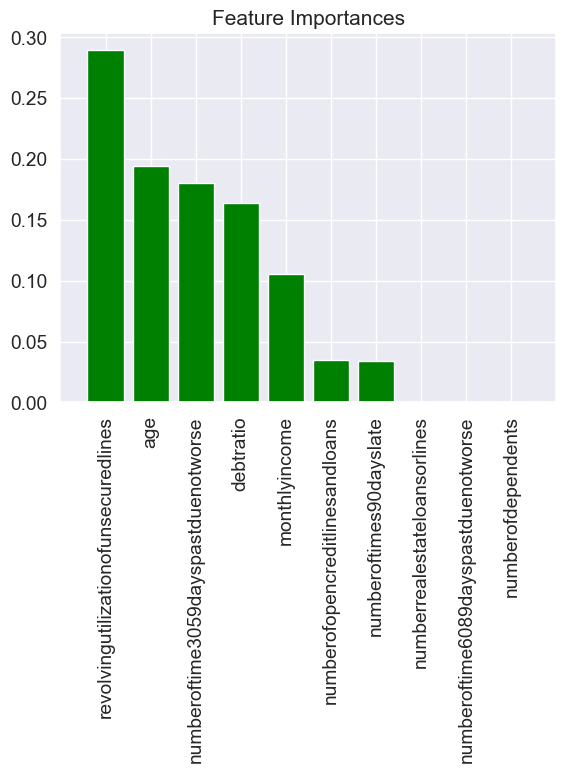

In [63]:
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices], color="green", align="center")
plt.xticks(range(X.shape[1]),features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

## Train and build baseline model

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, auc, roc_curve
import lightgbm as lgb

In [65]:
X = training_data.drop('seriousdlqin2yrs', axis=1)
y = training_data.seriousdlqin2yrs

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#### KNN 

In [67]:
knMod = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                             metric='minkowski', metric_params=None)

In [68]:
knMod.fit(X_train, y_train)

KNeighborsClassifier()

In [69]:
knMod.score(X_test, y_test)

0.92952

In [70]:
test_labels=knMod.predict_proba(np.array(X_test.values))[:,1]

In [71]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.5598981331178493

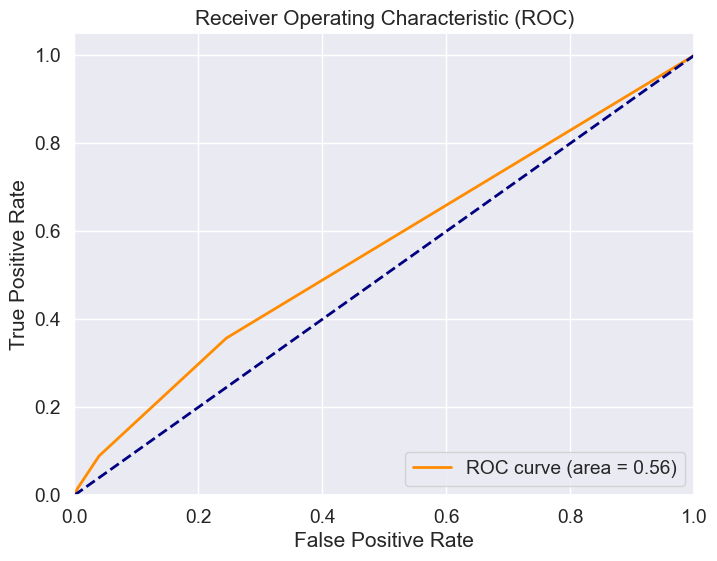

In [74]:
fpr, tpr, thresholds = roc_curve(y_test, test_labels)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#The dashed line on an ROC curve represents a baseline that indicates 
#the performance of a classifier that makes random predictions.

- The curve is above the diagonal line, which suggests that the classifier performs better than random chance. This is a good sign and indicates some ability to distinguish between the two classes.
- The curve approaches the top left corner but not very closely, which means that the classifier has a moderate true positive rate for lower false positive rates, but it doesn't achieve high true positive rates without also increasing the false positive rate significantly.

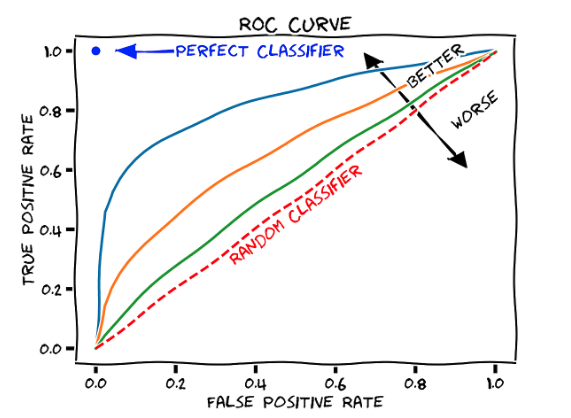

#### Logistic Regression

In [75]:
glmMod = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, 
                            random_state=None, solver='liblinear', max_iter=100,
                            multi_class='ovr', verbose=2)

In [76]:
glmMod.fit(X_train, y_train)

[LibLinear]iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 2
iter   6  #CD cycles 6
iter   7  #CD cycles 1
iter   8  #CD cycles 1
iter   9  #CD cycles 10
iter  10  #CD cycles 2
iter  11  #CD cycles 11
iter  12  #CD cycles 2
iter  13  #CD cycles 4
iter  14  #CD cycles 27
iter  15  #CD cycles 2
iter  16  #CD cycles 1
iter  17  #CD cycles 7
iter  18  #CD cycles 1
optimization finished, #iter = 18
Objective value = 23397.491794
#nonzeros/#features = 8/11


LogisticRegression(multi_class='ovr', penalty='l1', solver='liblinear',
                   verbose=2)

In [77]:
glmMod.score(X_test, y_test)

0.9329333333333333

In [78]:
test_labels=glmMod.predict_proba(np.array(X_test.values))[:,1]

In [79]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.7969783245179747

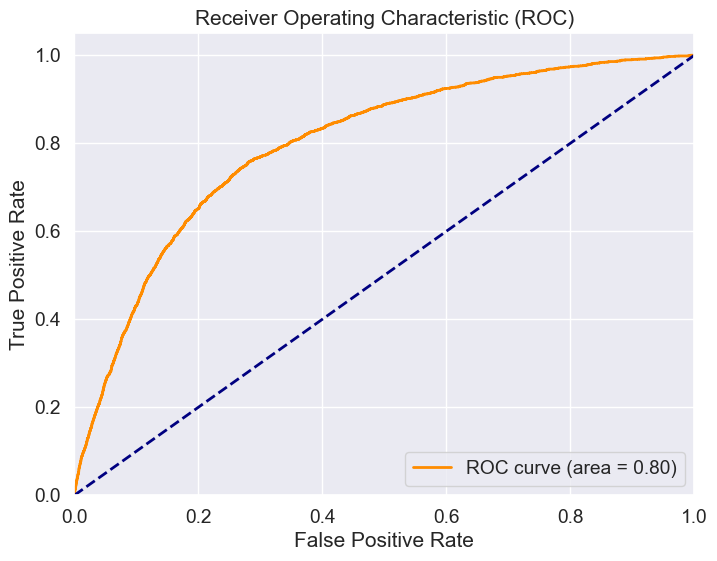

In [80]:
fpr, tpr, thresholds = roc_curve(y_test, test_labels)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#The dashed line on an ROC curve represents a baseline that indicates 
#the performance of a classifier that makes random predictions.

#### Adaboost Classifier

In [81]:
# Deleted base_estimator=None due to error 
adaMod = AdaBoostClassifier(n_estimators=200, learning_rate=1.0)

In [82]:
adaMod.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=200)

In [83]:
adaMod.score(X_test, y_test)

0.9330933333333333

In [84]:
test_labels=adaMod.predict_proba(np.array(X_test.values))[:,1]

In [85]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8054722697639759

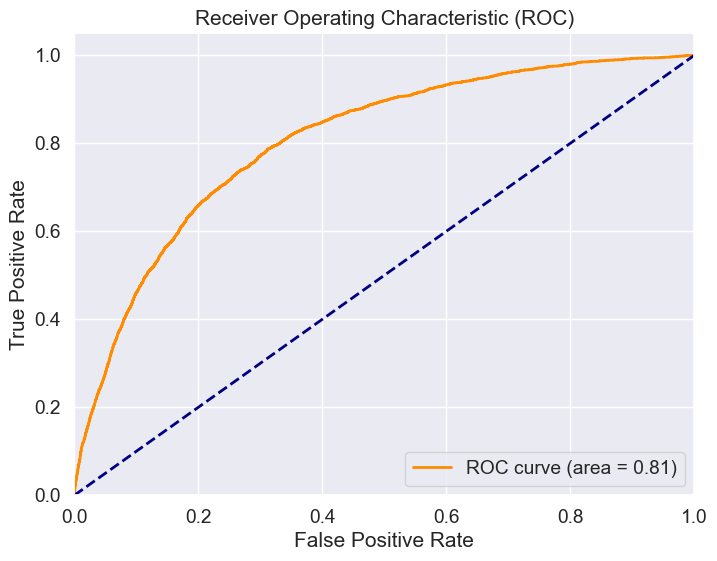

In [86]:
fpr, tpr, thresholds = roc_curve(y_test, test_labels)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#The dashed line on an ROC curve represents a baseline that indicates 
#the performance of a classifier that makes random predictions.

#### Gradientboosting Classifier

In [89]:
gbMod = GradientBoostingClassifier(loss='exponential', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                   max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)

In [90]:
gbMod.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential', n_estimators=200)

In [91]:
gbMod.score(X_test, y_test)

0.93328

In [92]:
test_labels=gbMod.predict_proba(np.array(X_test.values))[:,1]

In [93]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8088169663032067

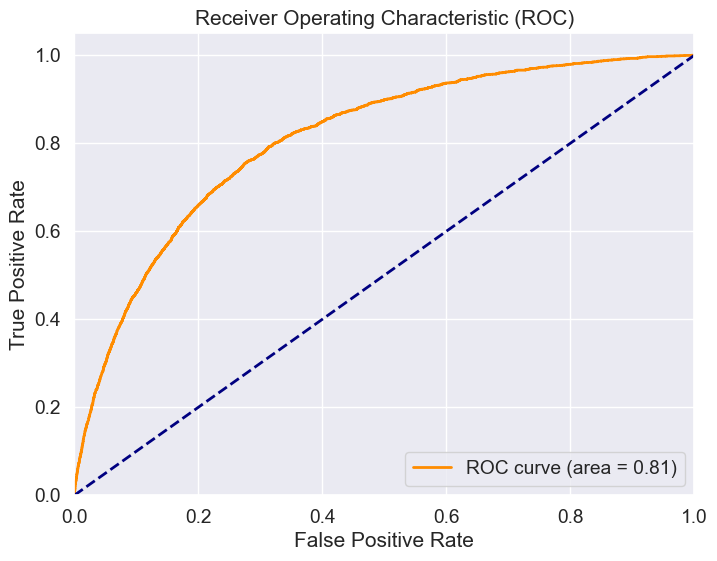

In [94]:
fpr, tpr, thresholds = roc_curve(y_test, test_labels)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#The dashed line on an ROC curve represents a baseline that indicates 
#the performance of a classifier that makes random predictions.

#### Light Gradient Boostin Machine(Newly added)

In [95]:
lgbmMod = lgb.LGBMClassifier(random_state=42, 
                                     num_leaves=31,
                                     max_depth=-1, 
                                     learning_rate=0.1, 
                                     n_estimators=100,
                                     min_child_samples=20)

In [96]:
lgbmMod.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 7517, number of negative: 104983
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 873
[LightGBM] [Info] Number of data points in the train set: 112500, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.066818 -> initscore=-2.636631
[LightGBM] [Info] Start training from score -2.636631


LGBMClassifier(random_state=42)

In [97]:
lgbmMod.score(X_test, y_test)

0.9328533333333333

In [98]:
test_labels=lgbmMod.predict_proba(np.array(X_test.values))[:,1]

In [99]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8064379624851208

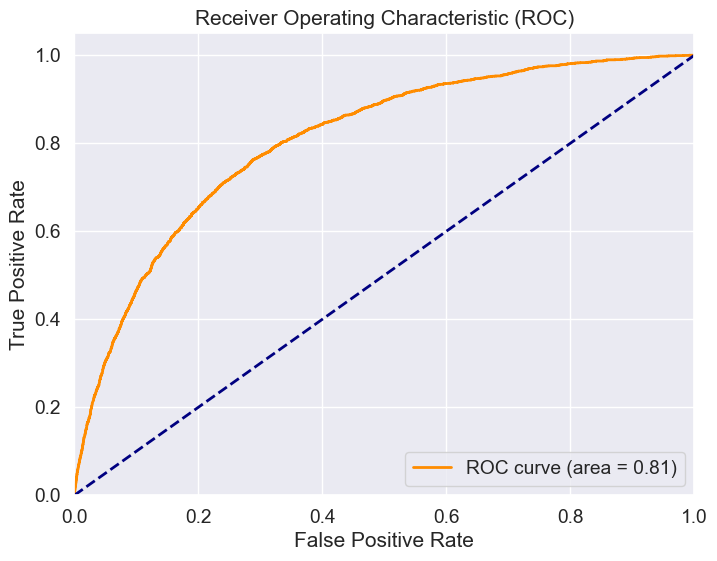

In [100]:
fpr, tpr, thresholds = roc_curve(y_test, test_labels)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#The dashed line on an ROC curve represents a baseline that indicates 
#the performance of a classifier that makes random predictions.

#### RandomForest Classifier

In [103]:
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt',
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, 
                               random_state=None, verbose=0)

In [104]:
rfMod.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=1)

In [105]:
rfMod.score(X_test, y_test)

0.9291733333333333

In [106]:
test_labels=rfMod.predict_proba(np.array(X_test.values))[:,1]

In [107]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.6987286681324957

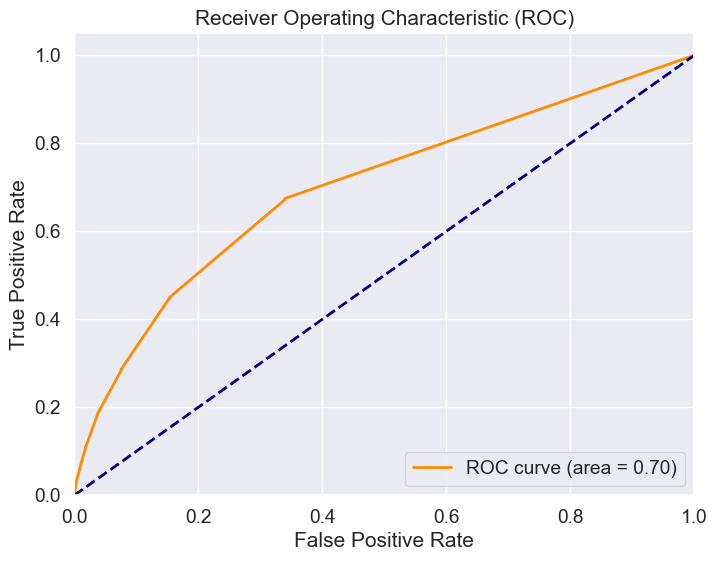

In [108]:
fpr, tpr, thresholds = roc_curve(y_test, test_labels)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#The dashed line on an ROC curve represents a baseline that indicates 
#the performance of a classifier that makes random predictions.

### Cross Validation

In [109]:
from sklearn.model_selection import cross_val_score
def cvDictGen(functions, scr, X_train=X, y_train=y, cv=5, verbose=1):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv=cv, verbose=verbose, scoring=scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

def cvDictNormalize(cvDict):
    cvDictNormalized = {}
    for key in cvDict.keys():
        for i in cvDict[key]:
            cvDictNormalized[key] = ['{:0.2f}'.format((cvDict[key][0]/cvDict[cvDict.keys()[0]][0])),
                                     '{:0.2f}'.format((cvDict[key][1]/cvDict[cvDict.keys()[0]][1]))]
    return cvDictNormalized

In [110]:
cvD = cvDictGen(functions=[knMod, glmMod, adaMod, gbMod, lgbmMod, rfMod], scr='roc_auc')
cvD

[LibLinear]iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 1
iter   6  #CD cycles 9
iter   7  #CD cycles 7
iter   8  #CD cycles 1
iter   9  #CD cycles 5
iter  10  #CD cycles 17
iter  11  #CD cycles 7
iter  12  #CD cycles 6
iter  13  #CD cycles 6
iter  14  #CD cycles 1
iter  15  #CD cycles 20
iter  16  #CD cycles 2
iter  17  #CD cycles 3
iter  18  #CD cycles 1
iter  19  #CD cycles 6
iter  20  #CD cycles 9
iter  21  #CD cycles 3
iter  22  #CD cycles 11
iter  23  #CD cycles 9
iter  24  #CD cycles 2
iter  25  #CD cycles 7
iter  26  #CD cycles 10
optimization finished, #iter = 26
Objective value = 24945.566325
#nonzeros/#features = 8/11
[LibLinear]iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 5
iter   6  #CD cycles 3
iter   7  #CD cycles 7
iter   8  #CD cycles 1
iter   9  #CD cycles 1
iter  10  #CD cycles 27
iter  11  #CD cycles 8
iter  12  #CD cycles 7
iter  1

{'KNeighborsClassifier': [0.5641663688967385, 0.004663071970601908],
 'LogisticRegression': [0.7935476660523714, 0.003935179473150103],
 'AdaBoostClassifier': [0.8029804167331767, 0.0038923746301007564],
 'GradientBoostingClassifier': [0.8069189467354129, 0.0033394604949725823],
 'LGBMClassifier': [0.8047597147736383, 0.003969792425807212],
 'RandomForestClassifier': [0.7026626901126625, 0.008466954350708494]}

<Axes: >

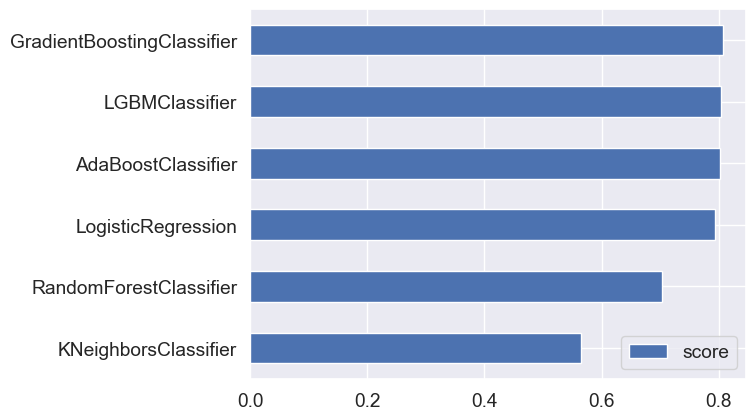

In [111]:
# Added Plot 
key = list(cvD.keys())
values = list([value[0] for value in cvD.values()])

df_temp = pd.DataFrame(values,key)
df_temp.columns = ['score']
df_temp_sorted = df_temp.sort_values(by='score', ascending=True)
df_temp_sorted.plot.barh()

### Hyper parameter optimization using Randomized search

In [112]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

#### AdaBoost

In [113]:
# added learning_rate 
adaHyperParams = {'n_estimators': [10,50,100,420],
                  'learning_rate' : [1, 0.1, 0.01]}

In [114]:
gridSearchAda = RandomizedSearchCV(estimator=adaMod, param_distributions=adaHyperParams, n_iter=5,
                                   scoring='roc_auc', cv=None, verbose=2)

gridSearchAda.fit(X_train, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..................learning_rate=1, n_estimators=100; total time=   3.8s
[CV] END ..................learning_rate=1, n_estimators=100; total time=   3.8s
[CV] END ..................learning_rate=1, n_estimators=100; total time=   3.7s
[CV] END ..................learning_rate=1, n_estimators=100; total time=   3.7s
[CV] END ..................learning_rate=1, n_estimators=100; total time=   3.7s
[CV] END ................learning_rate=0.1, n_estimators=420; total time=  15.6s
[CV] END ................learning_rate=0.1, n_estimators=420; total time=  15.5s
[CV] END ................learning_rate=0.1, n_estimators=420; total time=  15.4s
[CV] END ................learning_rate=0.1, n_estimators=420; total time=  15.4s
[CV] END ................learning_rate=0.1, n_estimators=420; total time=  15.4s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   3.7s
[CV] END ...............learning_rate=0.01, n_est

RandomizedSearchCV(estimator=AdaBoostClassifier(n_estimators=200), n_iter=5,
                   param_distributions={'learning_rate': [1, 0.1, 0.01],
                                        'n_estimators': [10, 50, 100, 420]},
                   scoring='roc_auc', verbose=2)

In [115]:
gridSearchAda.best_params_, gridSearchAda.best_score_

({'n_estimators': 420, 'learning_rate': 0.1}, 0.8021076748130731)

#### GradientBoosting

In [116]:
gbHyperParams = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': randint(10, 500),
                 'max_depth': randint(1,10)}

In [117]:
# gridSearchGB = RandomizedSearchCV(estimator=gbMod, param_distributions=gbHyperParams, n_iter=10,
#                                    scoring='roc_auc', cv=None, verbose=2)

# gridSearchGB.fit(X_train, y_train)

In [118]:
gridSearchGB = RandomizedSearchCV(estimator=gbMod, param_distributions=gbHyperParams, n_iter=10,
                                   scoring='roc_auc', cv=None, verbose=2)

gridSearchGB.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .....loss=exponential, max_depth=1, n_estimators=21; total time=   0.7s
[CV] END .....loss=exponential, max_depth=1, n_estimators=21; total time=   0.7s
[CV] END .....loss=exponential, max_depth=1, n_estimators=21; total time=   0.7s
[CV] END .....loss=exponential, max_depth=1, n_estimators=21; total time=   0.7s
[CV] END .....loss=exponential, max_depth=1, n_estimators=21; total time=   0.7s
[CV] END .......loss=deviance, max_depth=9, n_estimators=122; total time=   0.0s
[CV] END .......loss=deviance, max_depth=9, n_estimators=122; total time=   0.0s
[CV] END .......loss=deviance, max_depth=9, n_estimators=122; total time=   0.0s
[CV] END .......loss=deviance, max_depth=9, n_estimators=122; total time=   0.0s
[CV] END .......loss=deviance, max_depth=9, n_estimators=122; total time=   0.0s
[CV] END .......loss=deviance, max_depth=5, n_estimators=442; total time=   0.0s
[CV] END .......loss=deviance, max_depth=5, n_es

RandomizedSearchCV(estimator=GradientBoostingClassifier(loss='exponential',
                                                        n_estimators=200),
                   param_distributions={'loss': ['deviance', 'exponential'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x2a2a10450>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x2972d0890>},
                   scoring='roc_auc', verbose=2)

In [119]:
gridSearchGB = RandomizedSearchCV(estimator=gbMod, param_distributions=gbHyperParams, n_iter=10,
                                   scoring='roc_auc', cv=None, verbose=2).fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .....loss=exponential, max_depth=4, n_estimators=41; total time=   4.6s
[CV] END .....loss=exponential, max_depth=4, n_estimators=41; total time=   4.7s
[CV] END .....loss=exponential, max_depth=4, n_estimators=41; total time=   4.6s
[CV] END .....loss=exponential, max_depth=4, n_estimators=41; total time=   4.7s
[CV] END .....loss=exponential, max_depth=4, n_estimators=41; total time=   4.7s
[CV] END ....loss=exponential, max_depth=3, n_estimators=211; total time=  18.1s
[CV] END ....loss=exponential, max_depth=3, n_estimators=211; total time=  18.0s
[CV] END ....loss=exponential, max_depth=3, n_estimators=211; total time=  17.9s
[CV] END ....loss=exponential, max_depth=3, n_estimators=211; total time=  17.9s
[CV] END ....loss=exponential, max_depth=3, n_estimators=211; total time=  17.9s
[CV] END .......loss=deviance, max_depth=8, n_estimators=251; total time=   0.0s
[CV] END .......loss=deviance, max_depth=8, n_es

In [120]:
gridSearchGB.best_params_, gridSearchGB.best_score_

({'loss': 'exponential', 'max_depth': 3, 'n_estimators': 211},
 0.8050312959244359)

### Train models with help of new hyper parameter

In [121]:
bestGbModFitted = gridSearchGB.best_estimator_.fit(X_train, y_train)

In [122]:
bestAdaModFitted = gridSearchAda.best_estimator_.fit(X_train, y_train)

In [123]:
cvDictbestpara = cvDictGen(functions=[bestGbModFitted, bestAdaModFitted], scr='roc_auc')

In [124]:
cvDictbestpara

{'GradientBoostingClassifier': [0.8068645430862054, 0.0034113627311088217],
 'AdaBoostClassifier': [0.8035408519824616, 0.0033694818203152586]}

In [125]:
test_labels=bestGbModFitted.predict_proba(np.array(X_test.values))[:,1]

In [126]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8087309850751464

In [127]:
test_labels=bestAdaModFitted.predict_proba(np.array(X_test.values))[:,1]

In [128]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8066263614401603

### Feature Transformation

In [129]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p)
X_train_1 = np.array(X_train)
X_train_transform = transformer.transform(X_train_1)

In [130]:
bestGbModFitted_transformed = gridSearchGB.best_estimator_.fit(X_train_transform, y_train)

In [131]:
bestAdaModFitted_transformed = gridSearchAda.best_estimator_.fit(X_train_transform, y_train)

In [132]:
cvDictbestpara_transform = cvDictGen(functions=[bestGbModFitted_transformed, bestAdaModFitted_transformed],
                                     scr='roc_auc')

In [133]:
cvDictbestpara_transform

{'GradientBoostingClassifier': [0.8068687619846517, 0.003395932714571385],
 'AdaBoostClassifier': [0.8035408519824616, 0.0033694818203152586]}

In [134]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p)
X_test_1 = np.array(X_test)
X_test_transform = transformer.transform(X_test_1)

In [135]:
X_test_transform

array([[0.0200227 , 3.58351894, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.24795057, 3.78418963, 0.        , ..., 1.09861229, 0.        ,
        0.        ],
       [0.15253126, 4.40671925, 0.        , ..., 0.69314718, 0.        ,
        0.        ],
       ...,
       [0.67252095, 3.68887945, 0.        , ..., 0.        , 0.        ,
        1.09861229],
       [0.00598478, 3.91202301, 0.        , ..., 1.09861229, 0.        ,
        0.        ],
       [0.03764966, 3.8918203 , 0.        , ..., 0.69314718, 0.        ,
        0.        ]])

In [136]:
test_labels=bestGbModFitted_transformed.predict_proba(np.array(X_test_transform))[:,1]

In [137]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8087041832165485

In [138]:
test_labels=bestAdaModFitted_transformed.predict_proba(np.array(X_test_transform))[:,1]

In [139]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.80659492364597

### Voting based ensamble model

In [140]:
# Feature transformed
from sklearn.ensemble import VotingClassifier
votingMod = VotingClassifier(estimators=[('gb', bestGbModFitted_transformed), 
                                         ('ada', bestAdaModFitted_transformed)], voting='soft',weights=[2,1])
votingMod = votingMod.fit(X_train_transform, y_train)

In [141]:
test_labels=votingMod.predict_proba(np.array(X_test_transform))[:,1]

In [142]:
votingMod.score(X_test_transform, y_test)

0.9332266666666666

In [143]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8088078083370729

In [144]:
# Feature X transformed 
from sklearn.ensemble import VotingClassifier
votingMod_old = VotingClassifier(estimators=[('gb', bestGbModFitted), ('ada', bestAdaModFitted)], 
                                 voting='soft',weights=[2,1])
votingMod_old = votingMod.fit(X_train, y_train)

- estimators: A list of tuples where each tuple contains a name and the model instance. Here, two models are used: bestGbModFitted_transformed and bestAdaModFitted_transformed, which are presumably pre-trained models based on Gradient Boosting and AdaBoost algorithms, respectively.
- voting='soft': This specifies that soft voting is used, meaning the predictions will be based on the average probabilities from both models.
- weights=[2,1]: This assigns different weights to the models, giving twice as much importance to the predictions from the first model (bestGbModFitted_transformed) compared to the second one (bestAdaModFitted_transformed). This is useful when one model is known to perform better than the other and thus should have a bigger impact on the final decision.


In [145]:
test_labels=votingMod_old.predict_proba(np.array(X_test.values))[:,1]

In [146]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8088487458125513

#### Feature importance of final model

In [147]:
X = training_data.drop('seriousdlqin2yrs', axis=1)
y = training_data.seriousdlqin2yrs
features_label = training_data.columns[1:]
forest = RandomForestClassifier (n_estimators = 10000, random_state=0, n_jobs = -1)
forest.fit(X,y)
importances = forest.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) revolvingutilizationofunsecuredlines 0.288983
 2) age                            0.193735
 3) numberoftime3059dayspastduenotworse 0.179962
 4) debtratio                      0.163328
 5) monthlyincome                  0.105263
 6) numberofopencreditlinesandloans 0.034879
 7) numberoftimes90dayslate        0.033850
 8) numberrealestateloansorlines   0.000000
 9) numberoftime6089dayspastduenotworse 0.000000
10) numberofdependents             0.000000


In [148]:
test_labels=bestGbModFitted_transformed.predict_proba(np.array(X_test_transform))[:,1]

In [149]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8087041832165485

In [150]:
test_labels=bestAdaModFitted_transformed.predict_proba(np.array(X_test_transform))[:,1]

In [151]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.80659492364597

### Voting based ensamble model

In [152]:
# Feature transformed
from sklearn.ensemble import VotingClassifier
votingMod = VotingClassifier(estimators=[('gb', bestGbModFitted_transformed), 
                                         ('ada', bestAdaModFitted_transformed)], voting='soft',weights=[2,1])
votingMod = votingMod.fit(X_train_transform, y_train)

In [153]:
test_labels=votingMod.predict_proba(np.array(X_test_transform))[:,1]

In [154]:
votingMod.score(X_test_transform, y_test)

0.9332266666666666

In [155]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8088393144742942

In [156]:
# Feature X transformed 
from sklearn.ensemble import VotingClassifier
votingMod_old = VotingClassifier(estimators=[('gb', bestGbModFitted), ('ada', bestAdaModFitted)], 
                                 voting='soft',weights=[2,1])
votingMod_old = votingMod.fit(X_train, y_train)

- estimators: A list of tuples where each tuple contains a name and the model instance. Here, two models are used: bestGbModFitted_transformed and bestAdaModFitted_transformed, which are presumably pre-trained models based on Gradient Boosting and AdaBoost algorithms, respectively.
- voting='soft': This specifies that soft voting is used, meaning the predictions will be based on the average probabilities from both models.
- weights=[2,1]: This assigns different weights to the models, giving twice as much importance to the predictions from the first model (bestGbModFitted_transformed) compared to the second one (bestAdaModFitted_transformed). This is useful when one model is known to perform better than the other and thus should have a bigger impact on the final decision.


In [157]:
test_labels=votingMod_old.predict_proba(np.array(X_test.values))[:,1]

In [158]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8088752629085207

#### Feature importance of final model

In [159]:
features_label_1 = training_data.columns[1:]
importances_1 = bestGbModFitted.feature_importances_
indices = np. argsort(importances_1)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label_1[i],importances_1[indices[i]]))

 1) revolvingutilizationofunsecuredlines 0.770245
 2) age                            0.073076
 3) numberoftime3059dayspastduenotworse 0.062613
 4) debtratio                      0.042414
 5) monthlyincome                  0.025142
 6) numberofopencreditlinesandloans 0.020502
 7) numberoftimes90dayslate        0.006008
 8) numberrealestateloansorlines   0.000000
 9) numberoftime6089dayspastduenotworse 0.000000
10) numberofdependents             0.000000


In [160]:
features_label_2 = training_data.columns[1:]
importances_2 = bestAdaModFitted.feature_importances_
indices = np. argsort(importances_2)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label_2[i],importances_2[indices[i]]))

 1) revolvingutilizationofunsecuredlines 0.245238
 2) age                            0.161905
 3) numberoftime3059dayspastduenotworse 0.157143
 4) debtratio                      0.135714
 5) monthlyincome                  0.130952
 6) numberofopencreditlinesandloans 0.126190
 7) numberoftimes90dayslate        0.042857
 8) numberrealestateloansorlines   0.000000
 9) numberoftime6089dayspastduenotworse 0.000000
10) numberofdependents             0.000000


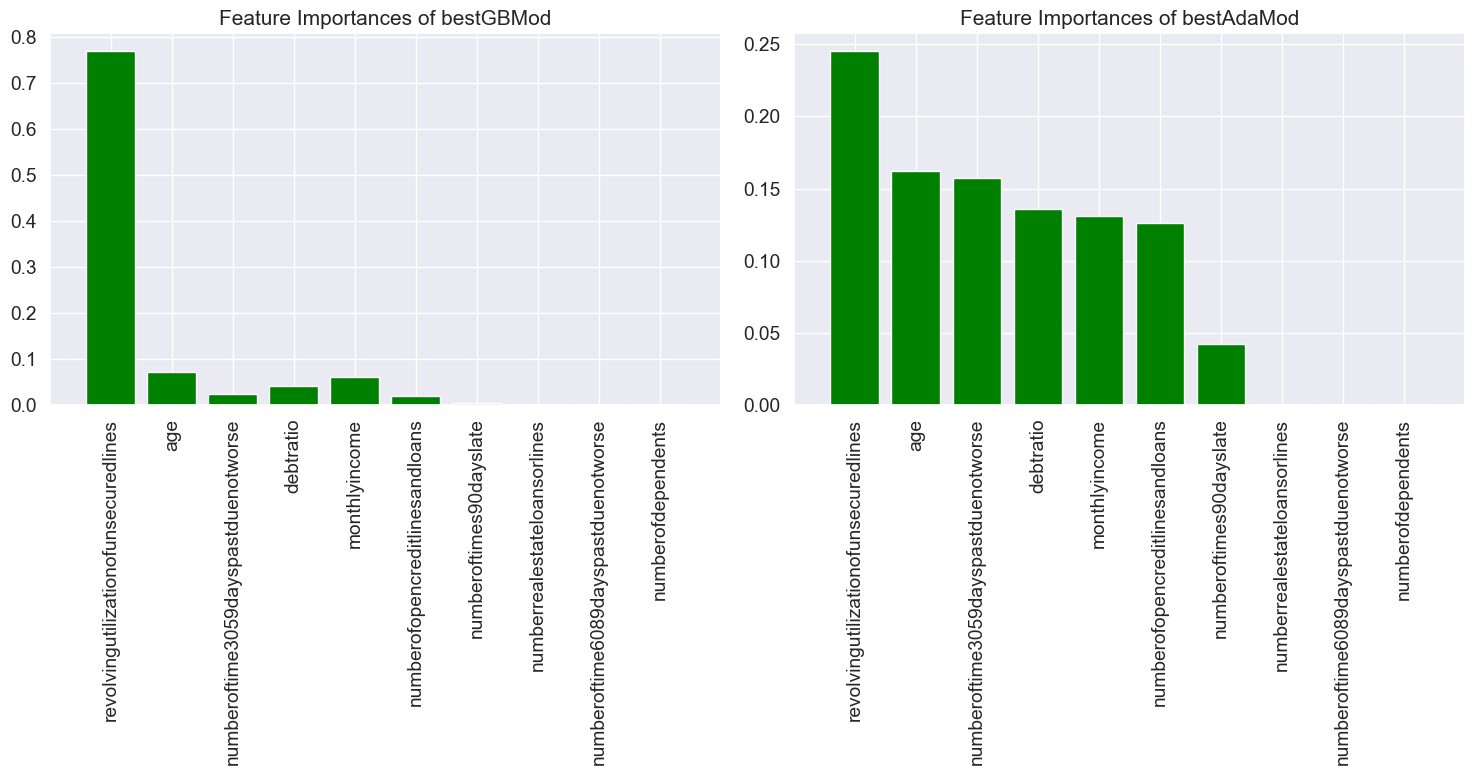

In [161]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))  # 1 row, 2 columns, and adjusting the figure size

# Plot for 'Feature Importances of bestGBMod'
ax[0].bar(range(X.shape[1]), importances_1[indices], color="green", align="center")
ax[0].set_xticks(range(X.shape[1]))
ax[0].set_xticklabels(features_label_1, rotation=90)
ax[0].set_xlim([-1, X.shape[1]])
ax[0].set_title('Feature Importances of bestGBMod')

# Plot for 'Feature Importances of bestAdaMod'
ax[1].bar(range(X.shape[1]), importances_2[indices], color="green", align="center")
ax[1].set_xticks(range(X.shape[1]))
ax[1].set_xticklabels(features_label_2, rotation=90)
ax[1].set_xlim([-1, X.shape[1]])
ax[1].set_title('Feature Importances of bestAdaMod')

plt.tight_layout()  # Adjust the layout to not overlap
plt.show()

### Testing on Real Test Dataset

In [163]:
# Read Training dataset as well as drop the index column
test_data = pd.read_csv('./cs-test.csv').drop('Unnamed: 0', axis = 1)
# For each column heading we replace "-" and convert the heading in lowercase 
cleancolumn = []
for i in range(len(test_data.columns)):
    cleancolumn.append(test_data.columns[i].replace('-', '').lower())
test_data.columns = cleancolumn

In [164]:
test_data.drop(['seriousdlqin2yrs'], axis=1, inplace=True)
test_data.fillna((training_data.median()), inplace=True)

In [165]:
test_labels_votingMod_old = votingMod_old.predict_proba(np.array(test_data.values))[:,1]
print (len(test_labels_votingMod_old))

101503


In [166]:
output = pd.DataFrame({'ID':test_data.index, 'probability':test_labels_votingMod_old})

In [167]:
output.to_csv("./predictions.csv", index=False)

In [168]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

# need to transfrom the test_data because we use model with transformed model 
transformer = FunctionTransformer(np.log1p)
test_data_temp = np.array(test_data)
test_data_transform = transformer.transform(test_data_temp)

In [169]:
test_labels_votingMod = votingMod.predict_proba(np.array(test_data.values))[:,1]
print (len(test_labels_votingMod_old))

101503


In [170]:
output = pd.DataFrame({'ID':test_data.index, 'probability':test_labels_votingMod})

In [171]:
output.to_csv("./predictions_voting_Feature_transformation.csv", index=False)